
## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time

In [3]:
# Load pickled data
import pickle


training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

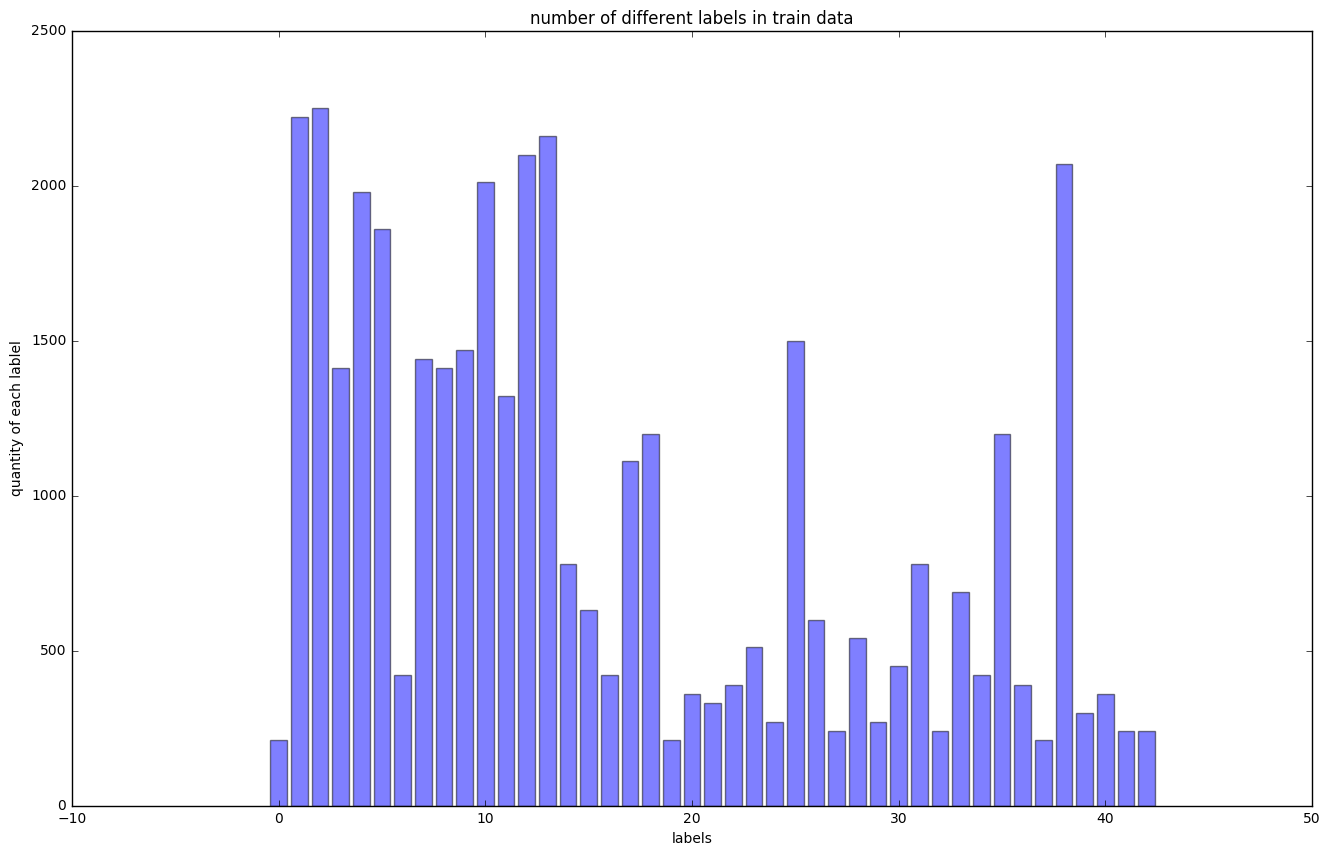

In [5]:
labels_count = np.unique(y_train, return_counts = True)
plt.figure(figsize=(16,10), dpi=75)
plt.bar(labels_count[0], labels_count[1], align='center', alpha=0.5)
plt.title('number of different labels in train data')
plt.xlabel('labels')
plt.ylabel('quantity of each lablel')
plt.show()

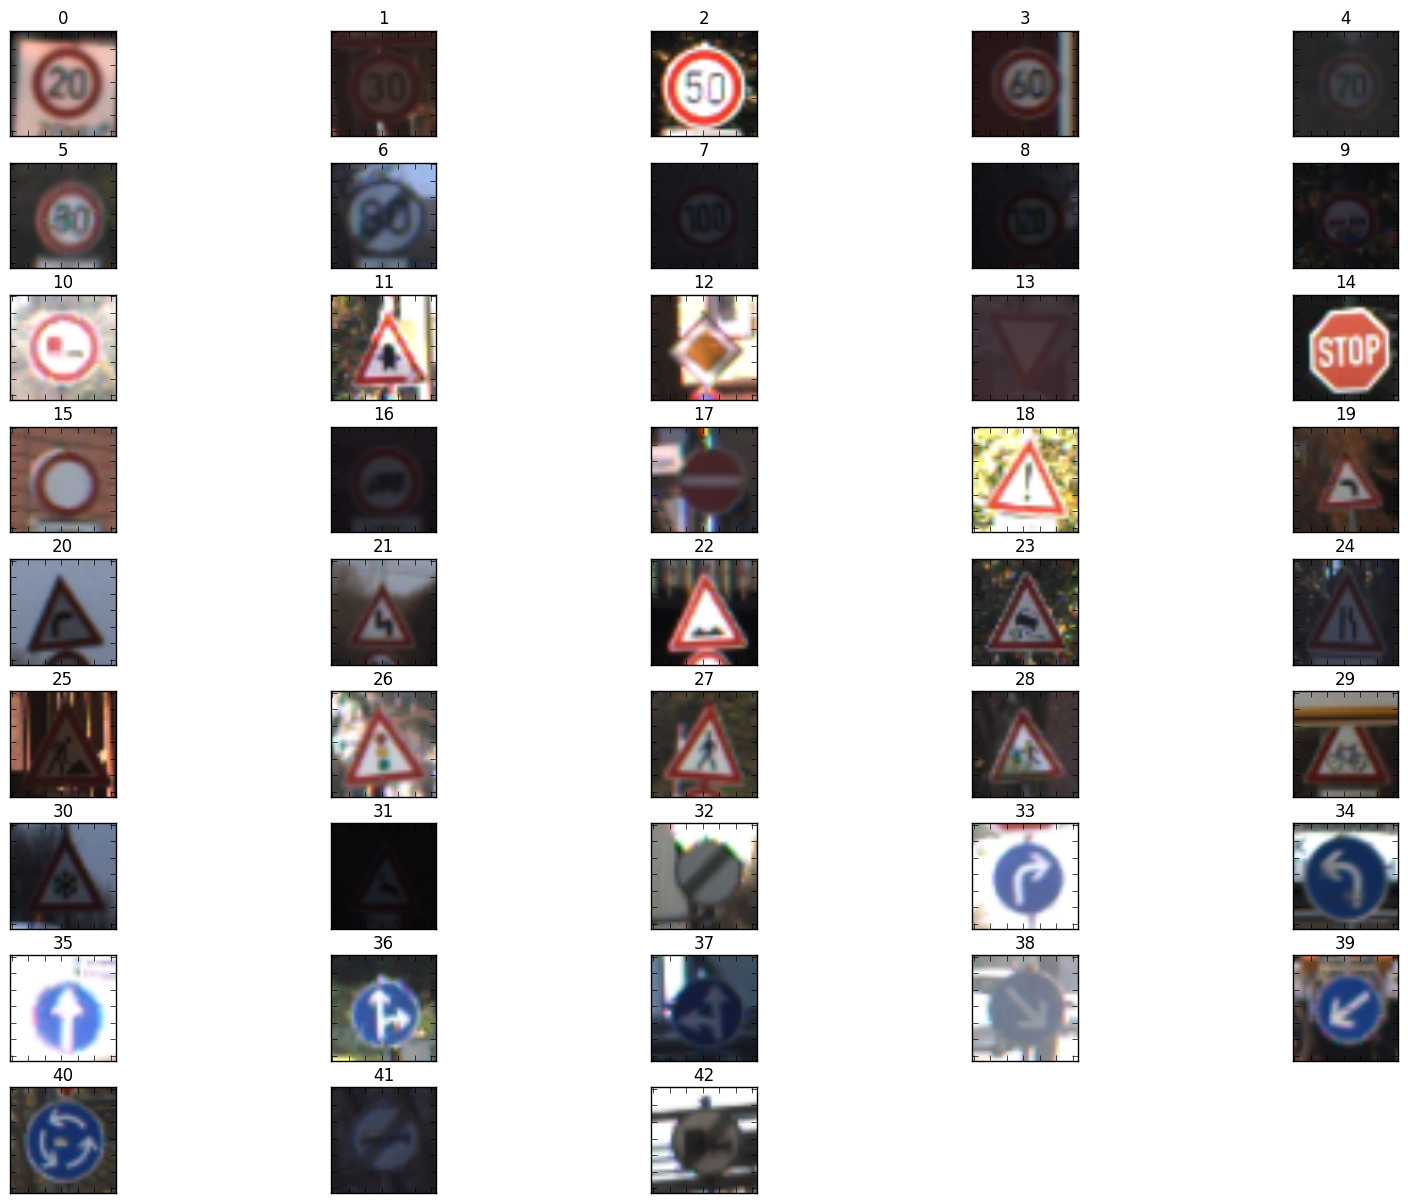

In [8]:
df_y_train = pd.DataFrame(y_train)
plt.figure(figsize=(20,15))
for i in range(43):
    ax= plt.subplot(9,5 ,i+1)
    im=ax.imshow(X_train[(df_y_train.loc[df_y_train[0] == i]).index.values[100]])
    ax.figsize=(5,5)
    #plt.tight_layout()
    plt.subplots_adjust(hspace=.25)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(i)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Due the class imbalance problem stratified shuffle split function has been used. 20% of the training set has been held out as validation set. This ensures class distribution is similar in training and validation sets.

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import math

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=0, test_size=0.2, stratify=y_train)

Neural Networks are good at capturing the order of the data that's why it's best to shuffle the data.

In [8]:
X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [10]:
image_size = 32
patch_size = 5
num_channels = 3
num_labels = 43
filter_depth1 = 12
filter_depth2 = 32
flatten = 800 #filter_depth2 * patch_size * patch_size
hiddden_neurons1 = 240
hiddden_neurons2 = 168

In [11]:
#2conv and 3 fc

from tensorflow.contrib.layers import flatten

def model(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, num_channels, filter_depth1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.constant(0.001, shape=[filter_depth1]))

    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    dropout_layer1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, filter_depth1, filter_depth2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.constant(0.001, shape=[filter_depth2]))
    conv2   = tf.nn.conv2d(dropout_layer1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    dropout_layer2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(dropout_layer2)
    fc0_shape = (fc0.get_shape().as_list()[-1], hiddden_neurons1)

    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0_shape), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.constant(0.001, shape=[hiddden_neurons1]))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    dropout_layer_fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(hiddden_neurons1, hiddden_neurons2), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.constant(0.001, shape=[hiddden_neurons2]))
    fc2    = tf.matmul(dropout_layer_fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    dropout_layer_fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 168. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(hiddden_neurons2, num_labels), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.constant(0.001, shape=[num_labels]))
    logits = tf.matmul(dropout_layer_fc2, fc3_W) + fc3_b
    
    regularizers = (tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W))


    return logits, regularizers

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 20
BATCH_SIZE = 128


In [13]:
x = tf.placeholder(tf.float32, (None, image_size, image_size, num_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder("float")

one_hot_y = tf.one_hot(y, num_labels)

In [14]:
rate = 0.001

logits = model(x)[0]
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + 0.05 * model(x)[1]
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss / num_examples , total_accuracy / num_examples

In [16]:
start_time = time.time()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.75})
            
        training_loss, training_accuracy = evaluate(X_train, y_train)    
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    # Save the variables to disk.
    save_path = saver.save(sess, "./model2.ckpt")
    print("Model saved in file: %s" % save_path)
    
print("--- %s seconds ---" % (time.time() - start_time))

Training...

EPOCH 1 ...
Training Loss = 0.895
Training Accuracy = 0.781
Validation Accuracy = 0.778

EPOCH 2 ...
Training Loss = 0.364
Training Accuracy = 0.917
Validation Accuracy = 0.910

EPOCH 3 ...
Training Loss = 0.220
Training Accuracy = 0.948
Validation Accuracy = 0.945

EPOCH 4 ...
Training Loss = 0.178
Training Accuracy = 0.966
Validation Accuracy = 0.961

EPOCH 5 ...
Training Loss = 0.117
Training Accuracy = 0.972
Validation Accuracy = 0.968

EPOCH 6 ...
Training Loss = 0.116
Training Accuracy = 0.978
Validation Accuracy = 0.973

EPOCH 7 ...
Training Loss = 0.095
Training Accuracy = 0.982
Validation Accuracy = 0.976

EPOCH 8 ...
Training Loss = 0.078
Training Accuracy = 0.984
Validation Accuracy = 0.975

EPOCH 9 ...
Training Loss = 0.079
Training Accuracy = 0.986
Validation Accuracy = 0.982

EPOCH 10 ...
Training Loss = 0.050
Training Accuracy = 0.988
Validation Accuracy = 0.984

EPOCH 11 ...
Training Loss = 0.056
Training Accuracy = 0.988
Validation Accuracy = 0.983

EPOCH 

In [16]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./model2.ckpt")
    print("Model restored.")
    
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model restored.
Test Accuracy = 0.951


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
### Input
The Covolutional Neural Network has been used to train the traffic sign data.

### Architecture
**Layer 1: Convolutional.**The input shape is 32x32x3 The output shape should be 28x28x12.

With VALID padding, the formula for the new height and width is:

out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))

out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))


**Activation.**  Rectified Linear Units with 0.01 bias has been used.

**Pooling.** The output shape should be 14x14x12.

**Layer 2: Convolutional.** The output shape should be 10x10x32.

**Activation.** Rectified Linear Units with 0.01 bias has been used

**Pooling.** The output shape should be 5x5x32.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 240 outputs.

**Activation.** Rectified Linear Units with 0.01 bias has been used

**Layer 4: Fully Connected.** This should have 168 outputs.

**Activation.** Rectified Linear Units with 0.01 bias has been used

**Layer 5: Fully Connected (Logits).** This should have 43 outputs as class labels.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 

Initialization of the weight with standard deviation of 0.05 was seen as one of the reasons to get the improvements. 

Dropout with probability of 0.25 along with increasing the number of hidden nodes and number of epochs gave me increase in the performance of the classifier. Dropout with 0.5 prolonged the training. 

L2 regulariser with beta of 0.05 is used to avoid overfitting of the model.

For ReLU non-linearities, some people like to use small constant value such as 0.01 for all biases because this ensures that all ReLU units fire in the beginning and therefore obtain and propagate some gradient.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imresize
from PIL import Image


In [18]:
img1=Image.open('cons.ppm')
img2=Image.open('round.jpg')
img3=Image.open('ped.jpeg')
img4=Image.open('20.png')
img5=Image.open('caution.ppm')


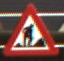

In [19]:
img1

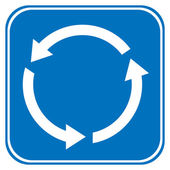

In [20]:
img2

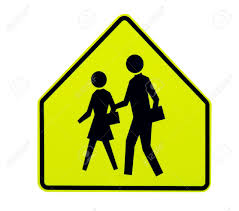

In [21]:
img3

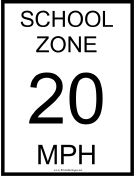

In [22]:
img4

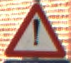

In [23]:
img5

In [24]:
def image_process(img):
    img_rgb = img.convert('RGB')
    img_resize = imresize(img_rgb, (32,32))
    return img_resize

In [25]:
img1 = image_process(img1)
img2 = image_process(img2)
img3 = image_process(img3)
img4 = image_process(img4)
img5 = image_process(img5)

In [26]:
img1 = img1.reshape(1,32,32,3)
img2 = img2.reshape(1,32,32,3)
img3 = img3.reshape(1,32,32,3)
img4 = img4.reshape(1,32,32,3)
img5 = img5.reshape(1,32,32,3)

In [35]:
#def evaluate_images(X_data, y_data):
def evaluate_images(X_data):
    sess = tf.get_default_session()
    #batch_x, batch_y = X_data, y_data
    batch_x = X_data
    #pred = sess.run(tf.nn.softmax(logits), feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
    pred = sess.run(tf.nn.softmax(logits), feed_dict={x: batch_x, keep_prob:1.0})
    topk = sess.run(tf.nn.top_k(pred, k=3))
    return topk

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The sizes of the pictures are different and if shrink to 32 by 32 results in loss of some information, making it difficult for classification.

In [36]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./model2.ckpt")
    print("Model restored.")

    test_loss, test_accuracy_cons = evaluate(img1, np.array([25]))
    test_loss, test_accuracy_round = evaluate(img2, np.array([40]))
    test_loss, test_accuracy_pedestrian = evaluate(img3, np.array([27]))
    test_loss, test_accuracy_20 = evaluate(img4, np.array([0]))
    test_loss, test_accuracy_caution = evaluate(img5, np.array([18]))
    
    print("Accuracy of construction sign = {:.3f}".format(test_accuracy_cons))
    print("Accuracy of round sign = {:.3f}".format(test_accuracy_round))
    print("Accuracy of pedestrian sign = {:.3f}".format(test_accuracy_pedestrian))
    print("Accuracy of 20 speed limit sign = {:.3f}".format(test_accuracy_20))
    print("Accuracy of caution sign = {:.3f}".format(test_accuracy_caution))
    
#    prediction_cons = evaluate_images(img1, np.array([25]))
#    prediction_round = evaluate_images(img2, np.array([40]))
#    prediction_pedestrian = evaluate_images(img3, np.array([27]))
#    prediction_20 = evaluate_images(img4, np.array([0]))
#    prediction_caution = evaluate_images(img5, np.array([18]))
    prediction_cons = evaluate_images(img1)
    prediction_round = evaluate_images(img2)
    prediction_pedestrian = evaluate_images(img3)
    prediction_20 = evaluate_images(img4)
    prediction_caution = evaluate_images(img5)

Model restored.
Accuracy of construction sign = 1.000
Accuracy of round sign = 1.000
Accuracy of pedestrian sign = 0.000
Accuracy of 20 speed limit sign = 0.000
Accuracy of caution sign = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._


**Answer:**

In [33]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def plot_softmax_visual(prediction):
    
    plt.figure(figsize=(10,2), dpi=75)
    plt.bar(np.arange(43),(prediction)[0])
    plt.xticks(np.arange(43))
    plt.show()
    

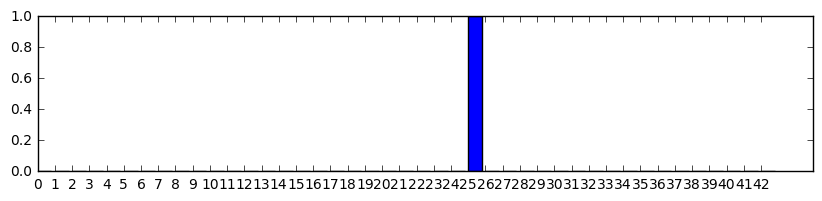

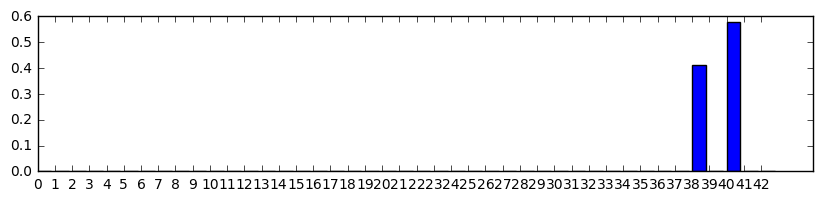

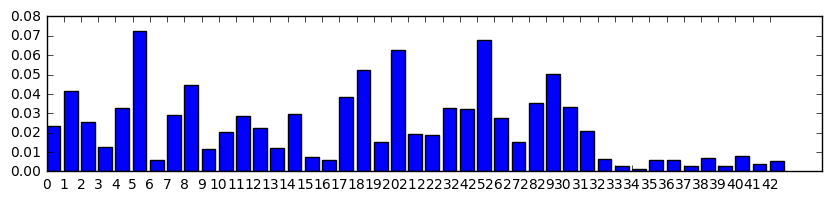

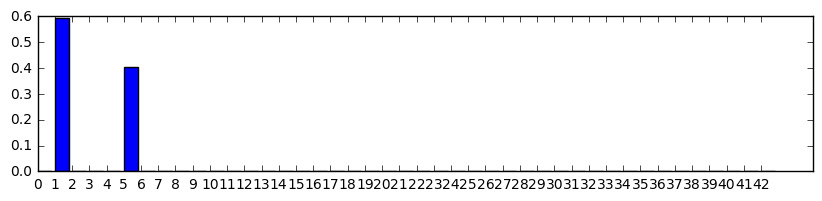

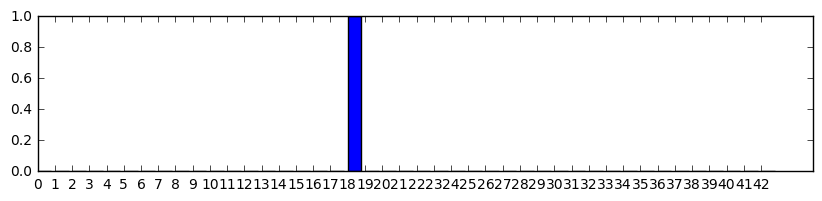

In [34]:
plot_softmax_visual(prediction_cons)
plot_softmax_visual(prediction_round)
plot_softmax_visual(prediction_pedestrian)
plot_softmax_visual(prediction_20)
plot_softmax_visual(prediction_caution)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [39]:
prediction_cons[1]

array([[25, 30, 11]], dtype=int32)